# Worksheet 18

Name:  U61451841

UID: Jason Kwan 

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

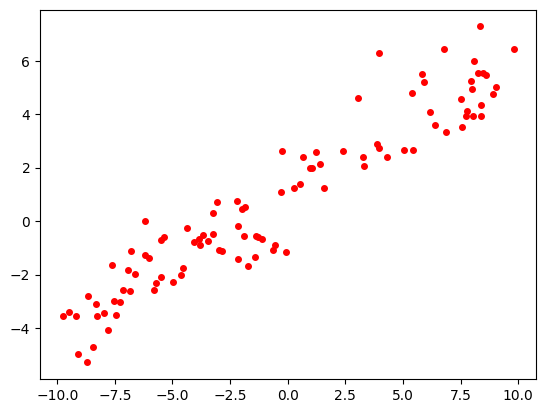

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , .5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

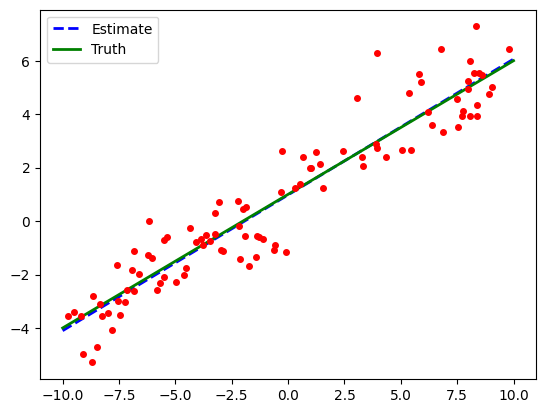

[0.97949592 0.50807027]
[1.  0.5]
Per-parameter distance: [0.02050408 0.00807027]
Cost: 0.022035121931979013


In [2]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()
print(beta_hat)
print(true_beta)
print(f"Per-parameter distance: {np.abs(beta_hat - true_beta)}")
print(f"Cost: {np.linalg.norm(beta_hat - true_beta)}")

c) How does the estimate of `beta` compare to the parameters we used to generate the data?


Estimate is close to the true beta parameters. The estimates parameters are off by approx. 0.01 and 0.001 from the truth with the Eucledian distance of 0.017.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

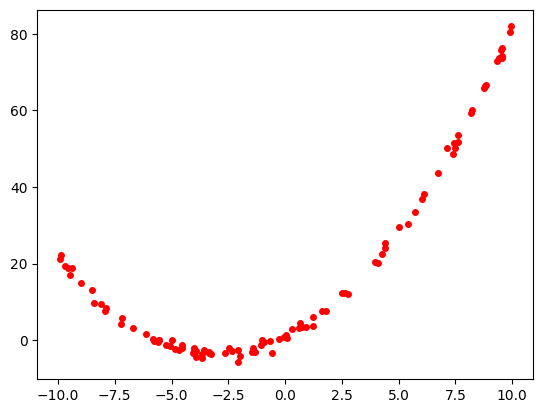

In [3]:

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3, 0.5])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

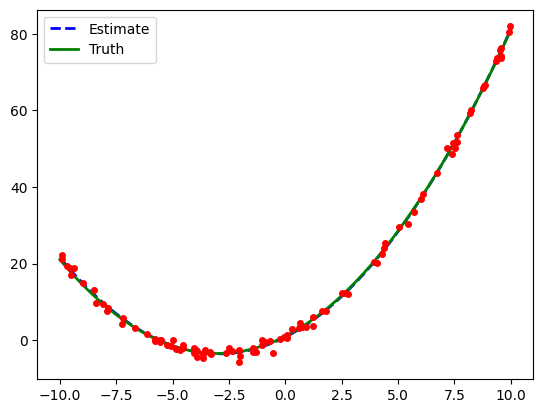

[0.79244634 2.98130713 0.5056843 ]
[1.  3.  0.5]
Per-parameter distance: [0.20755366 0.01869287 0.0056843 ]
Cost: 0.2084712372645985


In [4]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x * x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

print(beta_hat)
print(true_beta)
print(f"Per-parameter distance: {np.abs(beta_hat - true_beta)}")
print(f"Cost: {np.linalg.norm(beta_hat - true_beta)}")

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Similar to the first example, the estimated parameters are very close to the truth. 

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

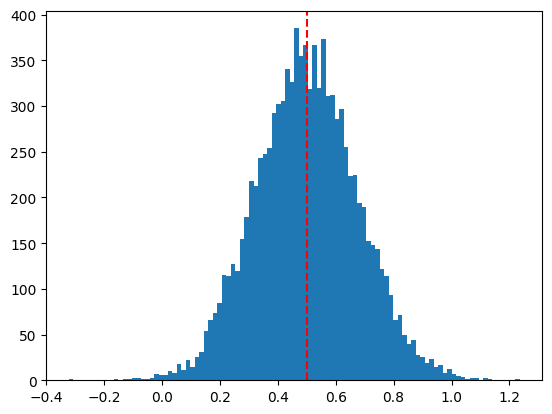

In [5]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, .5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + np.random.randn(100)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()